In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error
import seaborn as sns

In [3]:
covid = pd.read_csv('novel-corona-virus-2019-dataset/covid_19_data.csv')

In [4]:
covid.shape

(9117, 8)

In [5]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
df_brasil = covid[covid['Country/Region']  == 'Brazil']

In [8]:
df_brasil.shape

(31, 8)

In [10]:
df_brasil.head(31)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
82,83,01/23/2020,NaN,Brazil,1/23/20 17:00,0.0,0.0,0.0
2455,2456,02/26/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2559,2560,02/27/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2668,2669,02/28/2020,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2776,2777,02/29/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
2903,2904,03/01/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
3032,3033,03/02/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
3173,3174,03/03/2020,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
3322,3323,03/04/2020,NaN,Brazil,2020-03-04T20:33:02,4.0,0.0,0.0
3486,3487,03/05/2020,NaN,Brazil,2020-03-04T20:33:02,4.0,0.0,0.0


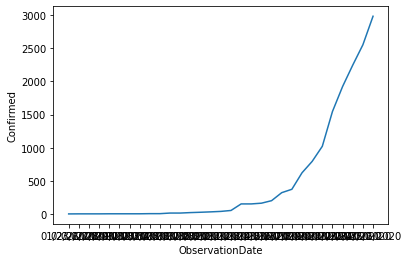

In [11]:
sns.lineplot(df_brasil['ObservationDate'] , df_brasil['Confirmed'])

In [23]:
df_sum = covid.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()

In [20]:
df_sum.head()

,ObservationDate,Confirmed,Deaths,Recovered
0,01/22/2020,555.0,17.0,28.0
1,01/23/2020,653.0,18.0,30.0
2,01/24/2020,941.0,26.0,36.0
3,01/25/2020,1438.0,42.0,39.0
4,01/26/2020,2118.0,56.0,52.0


In [21]:
df_sum.tail()

,ObservationDate,Confirmed,Deaths,Recovered
60,03/22/2020,337020.0,14623.0,97243.0
61,03/23/2020,378287.0,16497.0,100958.0
62,03/24/2020,417966.0,18615.0,107705.0
63,03/25/2020,467594.0,21181.0,113770.0
64,03/26/2020,529591.0,23970.0,122150.0


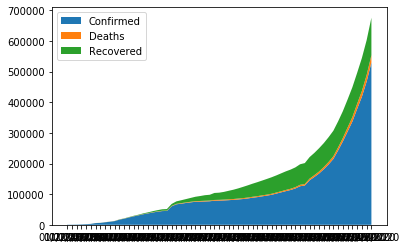

In [25]:
plt.stackplot(df_sum['ObservationDate'], [df_sum['Confirmed'], df_sum['Deaths'], df_sum['Recovered']],
              labels = ['Confirmed', 'Deaths', 'Recovered'])
plt.legend(loc = 'upper left')

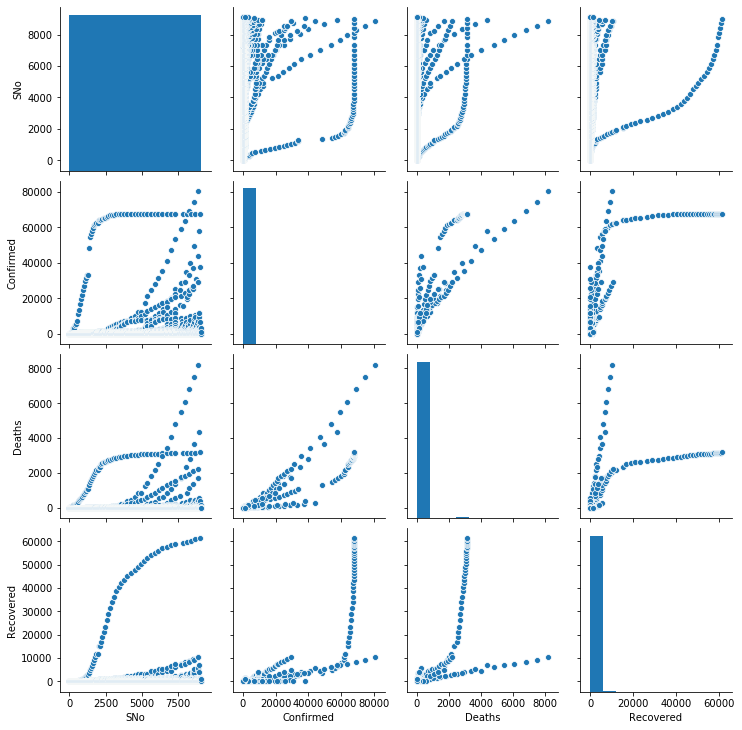

In [26]:
sns.pairplot(covid)

In [27]:
line_list_df = pd.read_csv('novel-corona-virus-2019-dataset/COVID19_line_list_data.csv')

In [28]:
line_list_df.shape

(1085, 27)

In [29]:
line_list_df.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


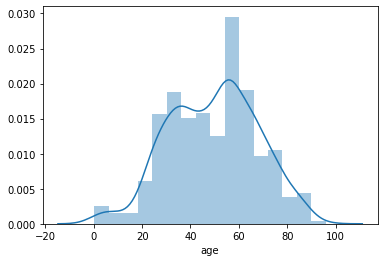

In [30]:
sns.distplot(line_list_df['age'])

In [31]:
deaths_df = pd.read_csv('novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')

In [32]:
deaths_df.shape

(248, 69)

In [33]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,2,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,2,2,2,2,2,4,5,5,6
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4,7,9,11,15,17,17,19,21,25
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,3
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
deaths_df.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
243,NaN,Mali,17.570692,-3.996166,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
244,NaN,Saint Kitts and Nevis,17.357822,-62.782998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,Northwest Territories,Canada,64.825500,-124.845700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,Yukon,Canada,64.282300,-135.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,NaN,Kosovo,42.602636,20.902977,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
deaths_df[deaths_df['Country/Region'] == 'Brazil' ]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,1,3,6,11,15,25,34,46,59,77


In [36]:
columns = deaths_df.keys()
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20'],
      dtype='object')

In [37]:
deaths_df = deaths_df.loc[ : ,columns[4]:columns[-1]]

In [38]:
deaths_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,2,4
1,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,4,5,5,6
2,0,0,0,0,0,0,0,0,0,0,...,4,7,9,11,15,17,17,19,21,25
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
deaths_df.keys()

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20'],
      dtype='object')

In [40]:
len(deaths_df.keys())

65

In [41]:
deaths_df['1/22/20'].sum()

17

In [43]:
deaths_df['3/26/20'].sum()

23970

In [45]:
dates = deaths_df.keys()
y = []
for i in dates:
    y.append(deaths_df[i].sum())

In [46]:
print(y)

[17, 18, 26, 42, 56, 82, 131, 133, 171, 213, 259, 362, 426, 492, 564, 634, 719, 806, 906, 1013, 1113, 1118, 1371, 1523, 1666, 1770, 1868, 2007, 2122, 2247, 2251, 2458, 2469, 2629, 2708, 2770, 2814, 2872, 2941, 2996, 3085, 3160, 3254, 3348, 3460, 3558, 3802, 3988, 4262, 4615, 4720, 5404, 5819, 6440, 7126, 7905, 8733, 9867, 11299, 12973, 14651, 16505, 18625, 21181, 23970]


In [47]:
len(y)

65

In [48]:
type(y)

list

In [50]:
y = np.array(y).reshape(-1,1)

In [51]:
y.shape

(65, 1)

In [53]:
y

array([[   17],
       [   18],
       [   26],
       [   42],
       [   56],
       [   82],
       [  131],
       [  133],
       [  171],
       [  213],
       [  259],
       [  362],
       [  426],
       [  492],
       [  564],
       [  634],
       [  719],
       [  806],
       [  906],
       [ 1013],
       [ 1113],
       [ 1118],
       [ 1371],
       [ 1523],
       [ 1666],
       [ 1770],
       [ 1868],
       [ 2007],
       [ 2122],
       [ 2247],
       [ 2251],
       [ 2458],
       [ 2469],
       [ 2629],
       [ 2708],
       [ 2770],
       [ 2814],
       [ 2872],
       [ 2941],
       [ 2996],
       [ 3085],
       [ 3160],
       [ 3254],
       [ 3348],
       [ 3460],
       [ 3558],
       [ 3802],
       [ 3988],
       [ 4262],
       [ 4615],
       [ 4720],
       [ 5404],
       [ 5819],
       [ 6440],
       [ 7126],
       [ 7905],
       [ 8733],
       [ 9867],
       [11299],
       [12973],
       [14651],
       [16505],
       [

In [54]:
X = np.arange(len(dates)).reshape(-1,1)

In [56]:
X.shape

(65, 1)

In [55]:
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64]])

In [57]:
forecast = np.arange(len(dates) + 10).reshape(-1,1) 

In [58]:
forecast.shape

(75, 1)

In [59]:
forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74]])

In [60]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.15 , shuffle = False)

In [61]:
X_test

array([[55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64]])

In [62]:
y_test

array([[ 7905],
       [ 8733],
       [ 9867],
       [11299],
       [12973],
       [14651],
       [16505],
       [18625],
       [21181],
       [23970]])

In [63]:
X_train.shape

(55, 1)

In [65]:
y_train.shape

(55, 1)

In [66]:
X_test.shape

(10, 1)

In [68]:
y_test.shape

(10, 1)

In [69]:
from sklearn.preprocessing import PolynomialFeatures

In [70]:
poly = PolynomialFeatures(degree = 4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [71]:
X_train_poly.shape

(55, 5)

In [72]:
X_test_poly.shape

(10, 5)

In [73]:
X_test_poly

array([[1.0000000e+00, 5.5000000e+01, 3.0250000e+03, 1.6637500e+05,
        9.1506250e+06],
       [1.0000000e+00, 5.6000000e+01, 3.1360000e+03, 1.7561600e+05,
        9.8344960e+06],
       [1.0000000e+00, 5.7000000e+01, 3.2490000e+03, 1.8519300e+05,
        1.0556001e+07],
       [1.0000000e+00, 5.8000000e+01, 3.3640000e+03, 1.9511200e+05,
        1.1316496e+07],
       [1.0000000e+00, 5.9000000e+01, 3.4810000e+03, 2.0537900e+05,
        1.2117361e+07],
       [1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 6.1000000e+01, 3.7210000e+03, 2.2698100e+05,
        1.3845841e+07],
       [1.0000000e+00, 6.2000000e+01, 3.8440000e+03, 2.3832800e+05,
        1.4776336e+07],
       [1.0000000e+00, 6.3000000e+01, 3.9690000e+03, 2.5004700e+05,
        1.5752961e+07],
       [1.0000000e+00, 6.4000000e+01, 4.0960000e+03, 2.6214400e+05,
        1.6777216e+07]])

In [74]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train_poly , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
poly_test_pred = regressor.predict(X_test_poly)
poly_test_pred

array([[ 7350.78519166],
       [ 7973.08182431],
       [ 8658.63972634],
       [ 9411.90406677],
       [10237.46099352],
       [11140.0376334 ],
       [12124.50209211],
       [13195.86345422],
       [14359.27178323],
       [15620.0181215 ]])

In [76]:
y_test

array([[ 7905],
       [ 8733],
       [ 9867],
       [11299],
       [12973],
       [14651],
       [16505],
       [18625],
       [21181],
       [23970]])

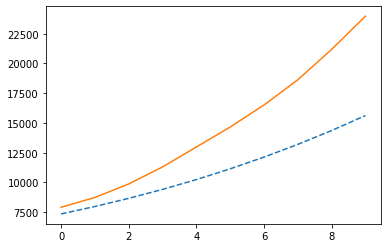

In [77]:
plt.plot(poly_test_pred , linestyle = 'dashed')
plt.plot(y_test)

In [78]:
print('MAE:' ,  mean_absolute_error(poly_test_pred , y_test))
print('MSE:' ,  mean_squared_error(poly_test_pred , y_test))
print('MSE:' ,  np.sqrt(mean_squared_error(poly_test_pred , y_test)))

MAE: 3563.7435112928406
MSE: 19063838.448380142
MSE: 4366.215575115381


In [79]:
forecast.shape

(75, 1)

In [80]:
X_train_all = poly.transform(forecast)
X_train_all.shape

(75, 5)

In [81]:

poly_pred_all = regressor.predict(X_train_all)
len(poly_pred_all)

75

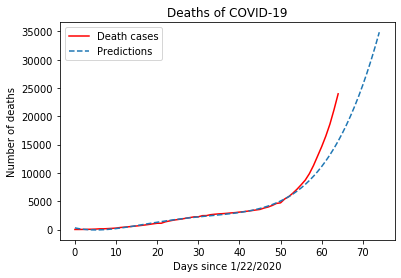

In [84]:
plt.plot(forecast[:-10] , y , color='red')
plt.plot(forecast,poly_pred_all , linestyle='dashed')
plt.title('Deaths of COVID-19')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('Number of deaths')
plt.legend(['Death cases' , 'Predictions'])